<a href="https://colab.research.google.com/github/Jectrianama/GCCE_TEST/blob/main/RCDNN1/segmentation_RCDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, roc_auc_score, mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode 
import numpy as np

def ook(t):
  lb = LabelBinarizer()
  y_ook = lb.fit_transform(t)  

  if len(np.unique(t))==2:
    y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1) 

  return y_ook

 

def evaluation_metrics(y_true, y_pred, print_result=True):
    acc = 0
    auc = 0
    auc_sk = 0
    #mi = 0
    nmi = 0
    #ami = 0
    bacc = 0
    
    # Accuracy
    #report = classification_report(y_pred.argmax(axis=1), y_true.ravel(), output_dict=True)
    acc = accuracy_score( y_true.ravel(), y_pred.argmax(axis=1))  #report['accuracy']
    
    # Balanced accuracy
    bacc = balanced_accuracy_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze(), adjusted=True)
    
   # # Mutual Information
   # mi = mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())
    
    # Normalized Mutual Information
    nmi = normalized_mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())
    
    # Adjusted Mutual Information
    #ami = adjusted_mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())
    
    # AUC (Tensorflow)
    auc_metric = tf.keras.metrics.AUC(from_logits=True)
    auc_metric.update_state(y_true, y_pred.argmax(axis=1).astype('float'))
    auc = auc_metric.result().numpy()
    auc_metric.reset_states()
    
    # AUC (scikit-learn)
    auc_sk = roc_auc_score(ook(y_true), y_pred)
    
    if print_result:
        print("Accuracy: {:.4f}".format(acc))
        print("Balanced Accuracy: {:.4f}".format(bacc))
        print("Mutual Information: {:.4f}".format(mi))
        print("Normalized Mutual Information: {:.4f}".format(nmi))
        print("Adjusted Mutual Information: {:.4f}".format(ami))
        print("AUC (Tensorflow): {:.4f}".format(auc))
        print("AUC (scikit-learn): {:.4f}".format(auc_sk))
    
    return acc, auc, auc_sk, nmi, bacc   # mi, , ami




# Subclassing for RCDNN

In [2]:
!git clone https://github.com/Jectrianama/GCCE_TEST.git

Cloning into 'GCCE_TEST'...
remote: Enumerating objects: 749, done.
remote: Counting objects: 100% (342/342), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 749 (delta 184), reused 215 (delta 122), pack-reused 407
Receiving objects: 100% (749/749), 33.62 MiB | 6.24 MiB/s, done.
Resolving deltas: 100% (352/352), done.


In [3]:
import os
os.chdir('/content/GCCE_TEST/Models')
from  keras_ma_gcce import *
from labels_generation import MA_Clas_Gen
os.chdir('../../')

In [4]:
#cargar datos desde drive otros dataset
FILEID = "1AU8pTtCLihBjCZjWITaAzpnEuL4RO436"
#https://drive.google.com/file/d/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  DataGCCE.zip && rm -rf /tmp/cookies.txt
!unzip -o DataGCCE.zip
!dir

--2023-02-13 06:12:05--  https://docs.google.com/uc?export=download&confirm=&id=1AU8pTtCLihBjCZjWITaAzpnEuL4RO436
Resolving docs.google.com (docs.google.com)... 74.125.204.101, 74.125.204.113, 74.125.204.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sao342ckl95rco7bv86gs92esodir0bk/1676268675000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=8202e1b7-df3c-42fb-9461-81fce8ed8676 [following]
--2023-02-13 06:12:06--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sao342ckl95rco7bv86gs92esodir0bk/1676268675000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=8202e1b7-df3c-42fb-9461-81fce8ed8676
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 142.250.157.132, 

In [5]:
#cargar datos desde drive acceso libre
FILEID = "1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW"
#https://drive.google.com/file/d/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MADatasets.zip && rm -rf /tmp/cookies.txt
!unzip -o MADatasets.zip
!dir

--2023-02-13 06:12:08--  https://docs.google.com/uc?export=download&confirm=t&id=1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW
Resolving docs.google.com (docs.google.com)... 74.125.204.101, 74.125.204.113, 74.125.204.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/invldob22bjea5r24sqt4vbmd6qm0ug8/1676268675000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=7abdc0f7-2abc-4b9b-9e2a-0eb70e618cf7 [following]
--2023-02-13 06:12:09--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/invldob22bjea5r24sqt4vbmd6qm0ug8/1676268675000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=7abdc0f7-2abc-4b9b-9e2a-0eb70e618cf7
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 142.250.157.132,

# Load Data

In [6]:
#load data
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf #importar tensorflow
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
database = 'Segmentation' #['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']


path_ = 'MADatasets/'+ database+ '.mat' 
Xdata = sio.loadmat(path_)
Xdata.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Y', 'iAnn', 'Exp', 'idxtr', 'idxte'])

In [7]:
X = Xdata['X']
# Xte = Xdata['Xte']
Y = Xdata['Y']
t = Xdata['y'].reshape(-1)
print('X',X.shape,'t',t.shape,'Y',Y.shape)
 

X (2310, 18) t (2310,) Y (2310, 5)


# Labels Generation  

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


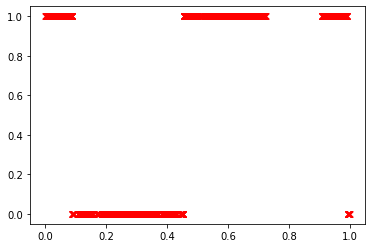

In [8]:
Y, iAnn, Lam_r = MA_Clas_Gen(X ,t, R=5, NrP=1)

In [9]:

Y = Y - 1
t = t - 1
 


annotator 1
              precision    recall  f1-score   support

           0       0.83      0.57      0.68       330
           1       0.85      1.00      0.92       330
           2       0.80      0.82      0.81       330
           3       0.87      0.60      0.71       330
           4       0.84      0.91      0.87       330
           5       0.86      1.00      0.93       330
           6       0.85      1.00      0.92       330

    accuracy                           0.84      2310
   macro avg       0.84      0.84      0.83      2310
weighted avg       0.84      0.84      0.83      2310

annotator 2
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       330
           1       0.00      0.00      0.00       330
           2       0.72      0.85      0.78       330
           3       0.72      0.82      0.76       330
           4       0.74      0.94      0.83       330
           5       0.71      0.91      0.80       330


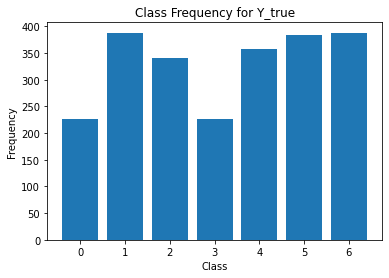

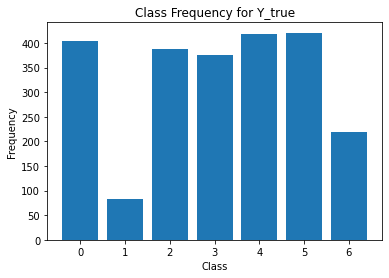

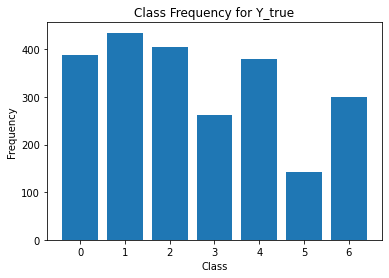

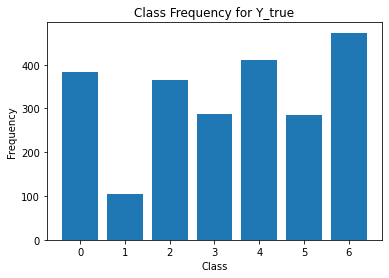

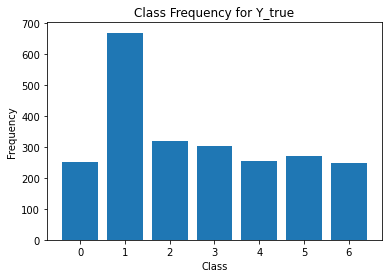

In [10]:
from sklearn.metrics import classification_report
for i in range(Y.shape[1]):
    print('annotator',i+1)
    print(classification_report(t,Y[:,i]))
    unique, counts = np.unique(Y[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique, counts)
#     unique, counts = np.unique(Y_test[5], return_counts=True)
#     plt.bar(unique, counts)

    plt.title('Class Frequency for Y_true')
    plt.xlabel('Class')
    plt.ylabel('Frequency')


# Split data

In [11]:
import numpy.matlib
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
Ns = 1
ss = ShuffleSplit(n_splits=Ns, test_size=0.3,random_state =123)
for train_index, test_index in ss.split(X):
    print(test_index)
    X_train, X_test,Y_train,Y_test = X[train_index,:], X[test_index,:],Y[train_index,:], Y[test_index,:]
    Y_true_train, Y_true_test = t[train_index].reshape(-1,1), t[test_index].reshape(-1,1)
print(X_train.shape, Y_train.shape, Y_true_train.shape)

[2031  671 1207 1236  343 1158  822  558   18 1644 2044 2257 1440 1290
 1758 2263 1422 1633   33  689  206 1380 2291   25 1652  961  279 2076
 1777  995 1424  493  132  224 1278 1162 1121 1496 2303  327 1233 1631
  417 1036  977 1708 2248 1204  803  711  856   50 2249  511 1567 1068
 1725   12 2097  704 1667 1253 2041  965 1055 1237 2071 2165 1106 1873
 2153  141 1860 1033  266 1661 1730  978 1614  813 1148   45 2045 2030
 1181 1209  746  421 2197 1331 2034  875 1049 1404 1137 1851  683  809
  515 1195 1256 2102 1018  967  476 1337 2170 1982  615 2177  388 1548
 1744  110  835 2100 1126 1109  935 1802 1977 1797  668  820  190 1707
 1542 1541  289  784 1446 1979 1903  326  292  420  798  239 1831  310
  449  708 1201 2176 1449   72  982  800 2213  403  381  148 1531  601
  466 2152 1676  351 1269 1412  728 1143  116 1790 1843 1818  658 1525
 2308 1333  735 1059  777 1637 2243 1686  409 1697 1978 1516 1217 2304
 1757  701 2266  120  680 1728  906  988  670 2179  375 1373 1913 1182
   58 

# Apply MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Testing the Class 


iteration: 0


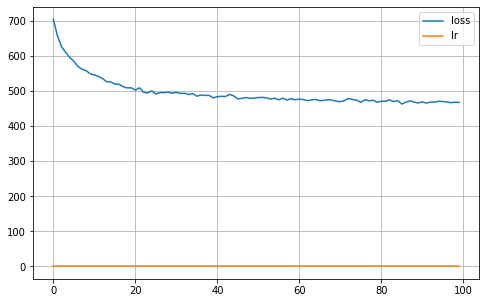

22/22 [==============================] - 0s 3ms/step
iteration: 1


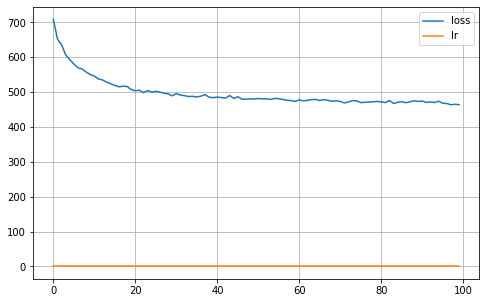

22/22 [==============================] - 0s 3ms/step
iteration: 2


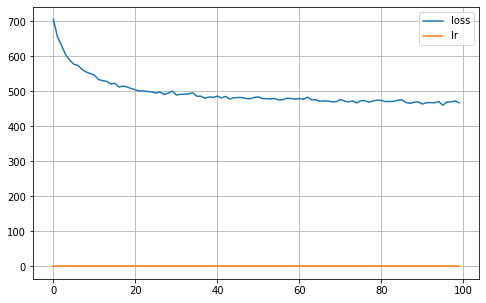

22/22 [==============================] - 0s 5ms/step
iteration: 3


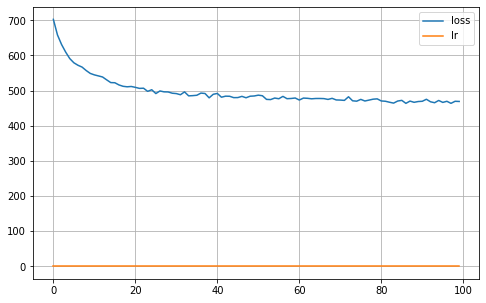

22/22 [==============================] - 0s 3ms/step
iteration: 4


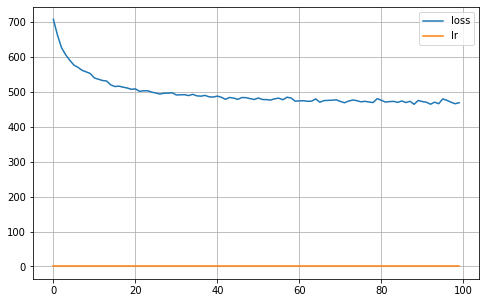

22/22 [==============================] - 0s 3ms/step
iteration: 5


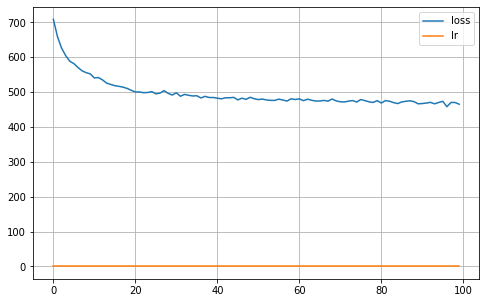

22/22 [==============================] - 0s 3ms/step
iteration: 6


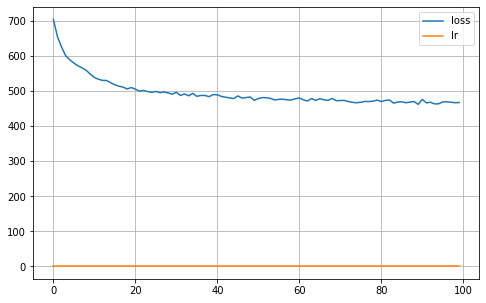

22/22 [==============================] - 0s 3ms/step
iteration: 7


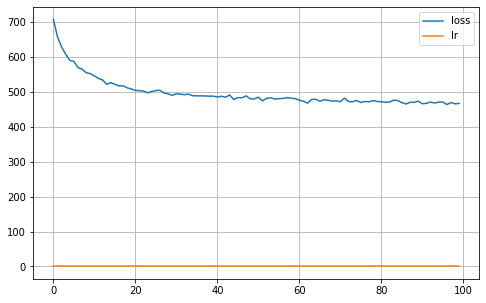

22/22 [==============================] - 0s 3ms/step
iteration: 8


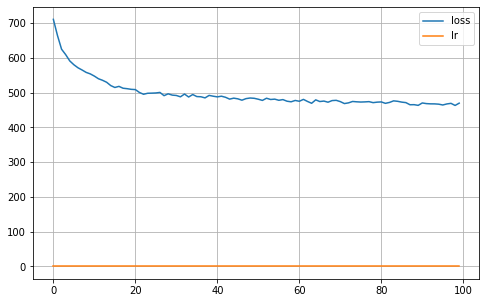

22/22 [==============================] - 0s 3ms/step
iteration: 9


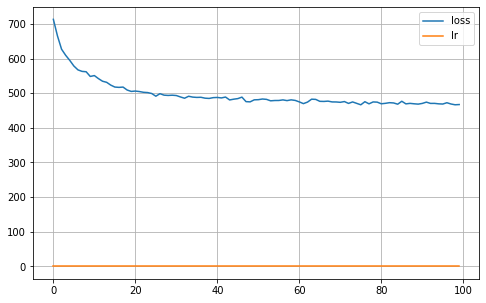

22/22 [==============================] - 0s 3ms/step


In [14]:
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
import pandas as pd
l1 =0.001
NUM_RUNS =10
custom_loss = "RCDNN"


results = []
for i in range(NUM_RUNS):

    print("iteration: " + str(i))
   
    MA = Keras_MA_GCCE(epochs=100,batch_size=64,R=5, K=len(np.unique(Y_true_train)), dropout=0.5, learning_rate=0.001,optimizer='Adam', 
                l1_param=l1,  validation_split=0, verbose=0, q=0.3, neurons=4, loss = custom_loss )
    
    MA.fit(X_train, Y_train)
    MA.plot_history()
  
    # Generate the predictions for the current run
    pred_2 = MA.predict(X_test)
     
    acc, auc, auc_sk,  nmi,  bacc = evaluation_metrics(Y_true_test,  pred_2[:,Y.shape[1]:], print_result=False)  # mi, ami,
    
    # Save the results for the current run to the list of dictionaries
    results.append({
        #'run': i,
        'accuracy': acc,
        'balanced_accuracy': bacc,
       # 'mutual_information': mi,
        'normalized_mutual_information': nmi,
     #   'adjusted_mutual_information': ami,
        'auc_tensorflow': auc,
        'auc_scikit_learn': auc_sk,
    })
    
# Convert the list of dictionaries to a DataFrame
df = np.round(pd.DataFrame(results)*100, 2)

# Calculate the mean and standard deviation of each metric
mean = np.round(df.mean(),2)
std = np.round(df.std(),2)  




In [15]:
df

,accuracy,balanced_accuracy,normalized_mutual_information,auc_tensorflow,auc_scikit_learn
0,87.01,85.32,79.74,98.839996,98.98
1,82.40,80.14,78.40,98.209999,98.42
2,85.86,83.98,79.92,98.870003,98.85
3,85.14,83.17,79.38,98.470001,98.72
4,85.14,83.21,80.00,98.230003,98.66
5,85.86,84.07,78.93,98.389999,98.84
6,85.43,83.60,80.99,99.410004,98.98
7,86.15,84.35,78.96,98.489998,99.05
8,85.28,83.48,78.87,98.930000,98.85
9,86.00,84.22,79.21,98.680000,98.88


In [16]:
mean

accuracy                         85.43
balanced_accuracy                83.55
normalized_mutual_information    79.44
auc_tensorflow                   98.65
auc_scikit_learn                 98.82
dtype: float64

In [17]:
std

accuracy                         1.21
balanced_accuracy                1.36
normalized_mutual_information    0.74
auc_tensorflow                   0.37
auc_scikit_learn                 0.18
dtype: float64

In [18]:
result_df = pd.concat([mean.rename('Mean'), std.rename('Std')], axis=1)

In [19]:
result_df

,Mean,Std
accuracy,85.43,1.21
balanced_accuracy,83.55,1.36
normalized_mutual_information,79.44,0.74
auc_tensorflow,98.65,0.37
auc_scikit_learn,98.82,0.18


In [20]:
# Save the DataFrame to an excel file
df.to_excel(database + custom_loss + ".xlsx")

In [21]:
# from sklearn.metrics import classification_report
 
# l1 =0.001
# NUM_RUNS =10
# ACC = np.zeros(NUM_RUNS)
# AUC = np.zeros(NUM_RUNS)
# for i in range(NUM_RUNS): #10
#     print("iteration: " + str(i))
   
#     MA = Keras_MA_RCDNN(epochs=100,batch_size=64,R=5, K=len(np.unique(Y_true_train)), dropout=0.5, learning_rate=0.001,optimizer='Adam', 
#                 l1_param=l1,  validation_split=0.30, verbose=0, q=0.3)

#     MA.fit(X_train, Y_train)
#     #MA.plot_history()
  
#     #Accuracy
#     pred_2 = MA.predict(X_test)
 
#     report = classification_report( pred_2[:,Y.shape[1]:].argmax(axis=1),Y_true_test.ravel(),output_dict=True)
#     ACC[i] = report['accuracy']
#     #AUC
#     val_AUC_metric = tf.keras.metrics.AUC( from_logits = True)  
#     val_logits =MA.predict(X_test) # model(X_test, training=False)
#     # tf.print(y_batch_val)
#     val_AUC_metric.update_state(Y_true_test, val_logits[:,Y.shape[1]:].argmax(axis=1).astype('float'))

#     val_AUC = val_AUC_metric.result()
#     val_AUC_metric.reset_states()
#     val_AUC = val_AUC.numpy()
#     print("Validation aUc: %.4f" % (float(val_AUC),))
#     AUC[i] = val_AUC
    
  